<a href="https://colab.research.google.com/github/Bagewadinitin/ML_Projects_LinearRegression/blob/main/fcc_bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dataset:

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [2]:
df=pd.read_csv('SeoulBikeData.csv').drop(['Date', 'Holiday', 'Seasons'], axis=1)

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df['Functioning Day']=(df['Functioning Day']== 'Yes').astype(int)

In [5]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [6]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [7]:
df=df[df['Hour']==12]
df=df.drop(['Hour'], axis=1)

In [8]:
df.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


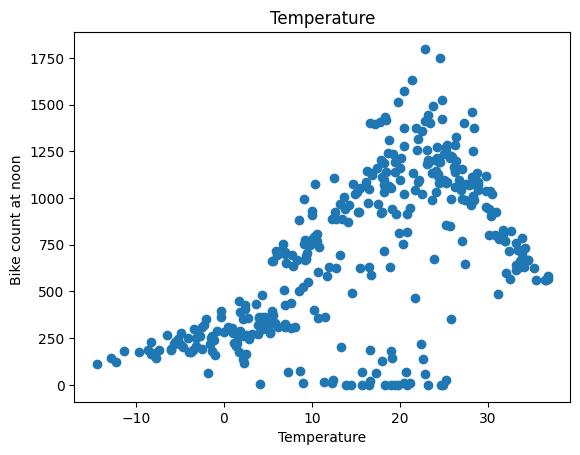

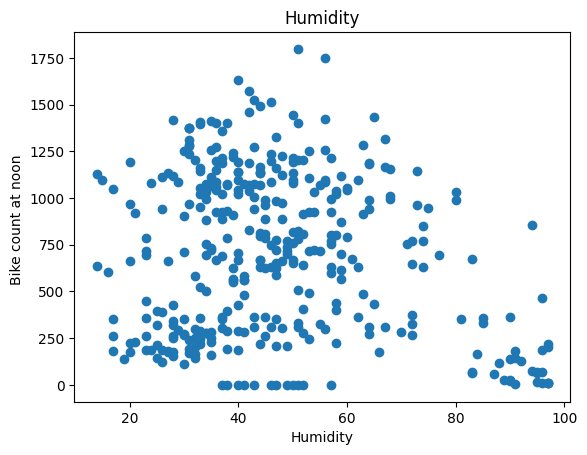

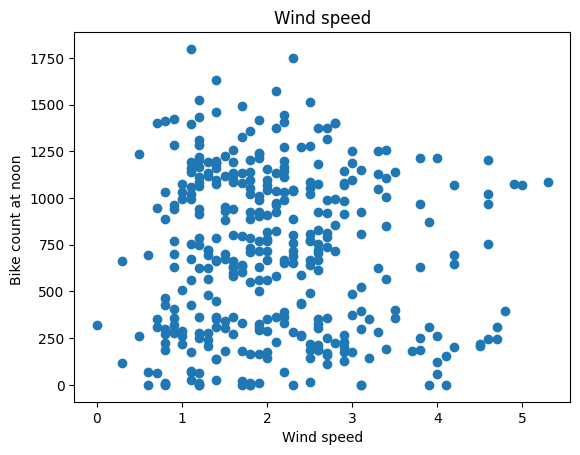

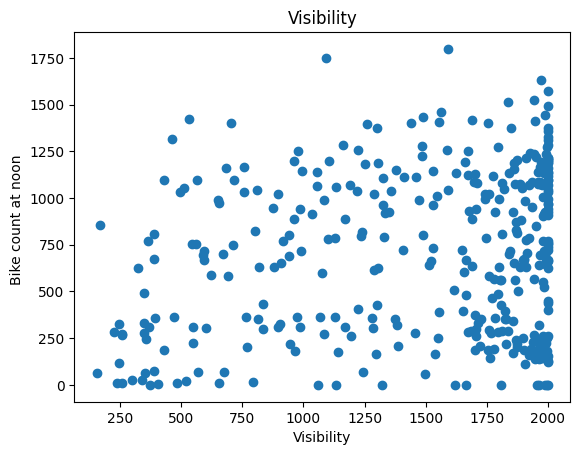

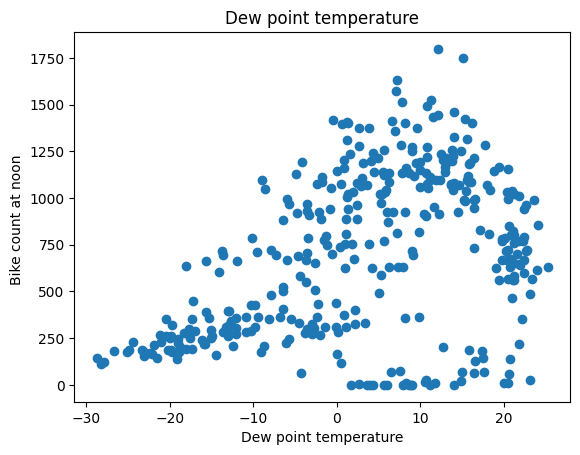

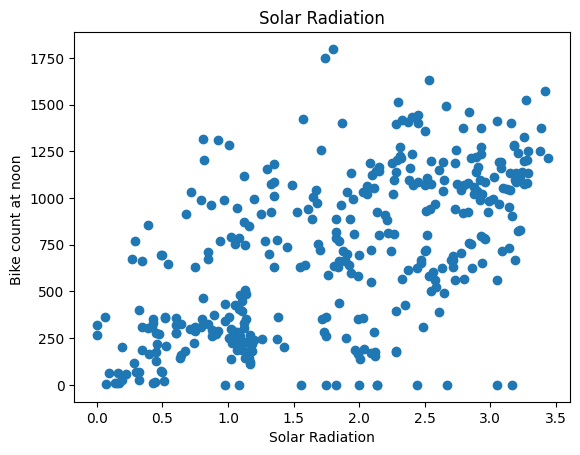

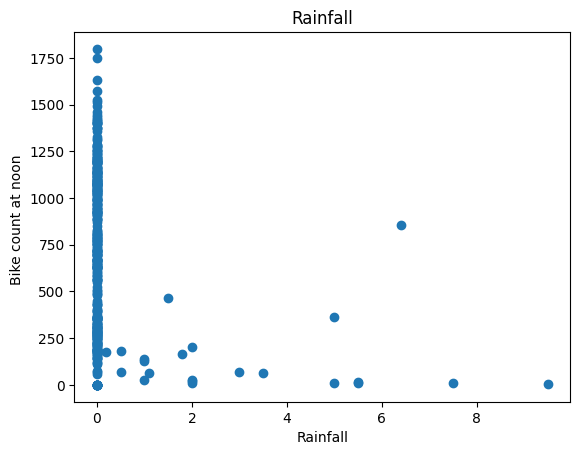

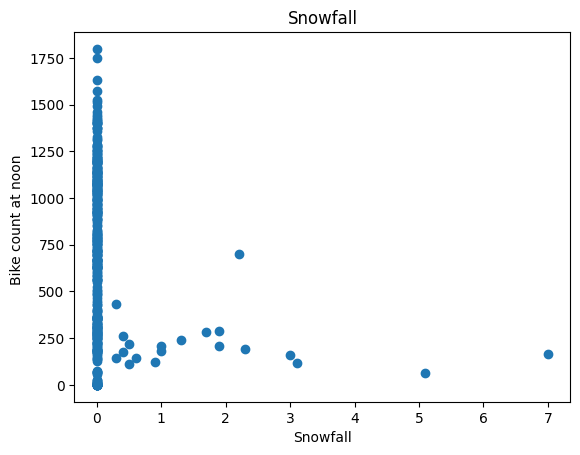

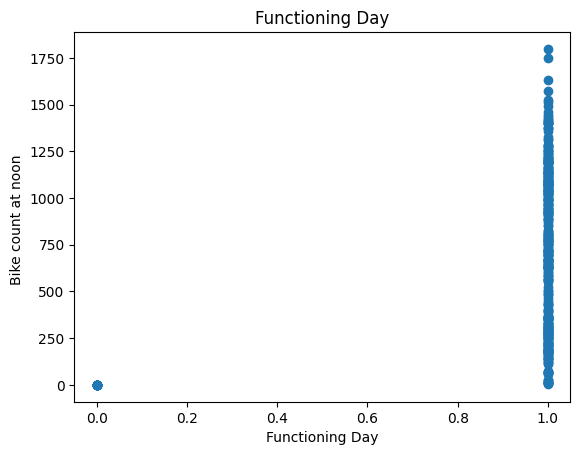

In [9]:
#plotting all features vs no of bike count to check which feature has impact on output
for label in df.columns[1:]:
  plt.scatter(df[label], df['Rented Bike Count'])
  plt.title(label)
  plt.ylabel('Bike count at noon ')
  plt.xlabel(label)
  plt.show()

In [10]:
# based on above grapghs few features doesn;t have any linear relation with output. Therefore dropping those features
df= df.drop(['Wind speed', 'Visibility', 'Functioning Day'], axis=1)

In [11]:
df.head()

,Rented Bike Count,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train, Valid and Test dataset

In [12]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [13]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe =copy.deepcopy(dataframe)
  if x_labels is None :
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y


In [14]:
_, X_train_temp, y_train_temp = get_xy(train, 'Rented Bike Count', x_labels=['Temperature'])
_, X_val_temp, y_val_temp = get_xy(val, 'Rented Bike Count', x_labels=['Temperature'])
_, X_test_temp, y_test_temp = get_xy(test, 'Rented Bike Count', x_labels=['Temperature'])

In [15]:
# Training regression model
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [16]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.73109927]] [364.17189955]


In [17]:
temp_reg.score(X_test_temp, y_test_temp) # there is some association between input and output features

0.26088467357704603

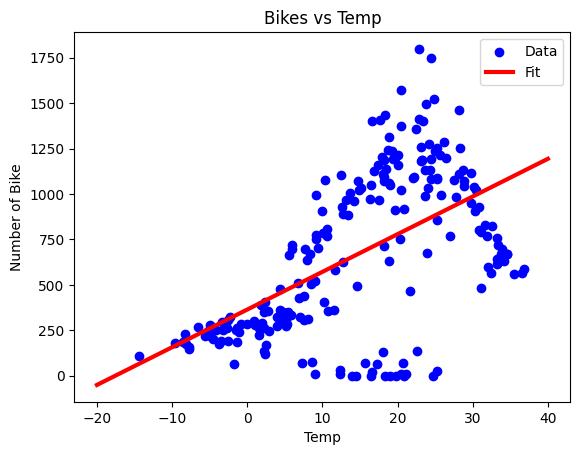

In [18]:
# plotting grapghs

plt.scatter(X_train_temp, y_train_temp, label = 'Data', color='blue')
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bike')
plt.xlabel('Temp')
plt.show()

Looking at the above best fit line with data, it is not satisfies all assumtions of Linear regression


# Multiple Linear Regression



In [19]:
_, X_train_all, y_train_all = get_xy(train, 'Rented Bike Count', x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, 'Rented Bike Count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'Rented Bike Count', x_labels=df.columns[1:])

In [20]:
all_reg=LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [21]:
all_reg.score(X_test_all, y_test_all) # good sign, improved score.

0.35782121979047676

# Regression with Neural Net

In [22]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [23]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [24]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [25]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [26]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose =0,
    epochs = 1000,
    validation_data=(X_val_temp, y_val_temp)
)

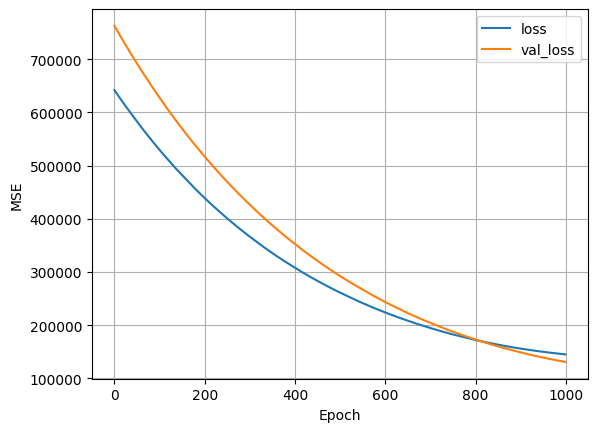

In [27]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


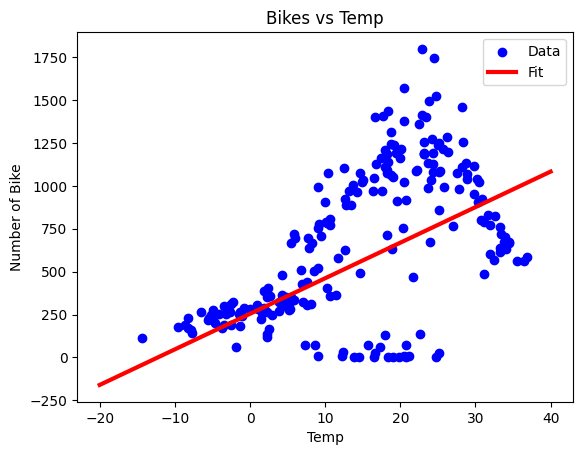

In [28]:
plt.scatter(X_train_temp, y_train_temp, label = 'Data', color='blue')
x=tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bike')
plt.xlabel('Temp')
plt.show()

# Multiple Linear Regression using Neural Net

In [56]:
# develop this model

# Neural Net

In [34]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model= tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [35]:
history= nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

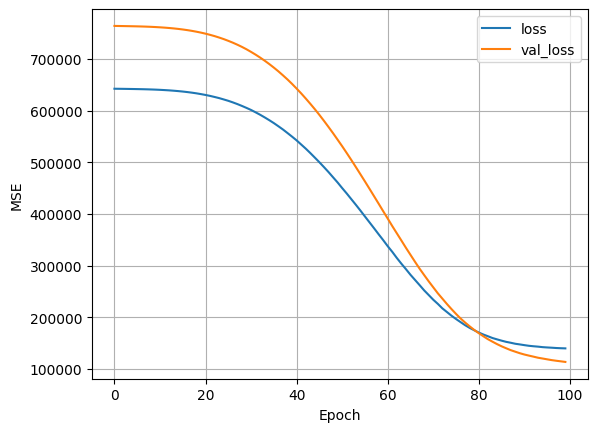

In [36]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


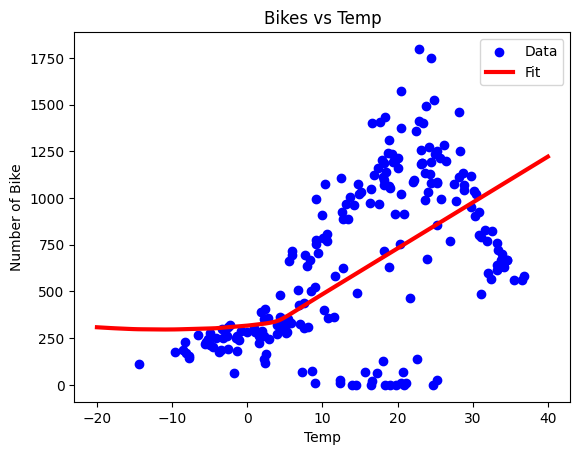

In [37]:
plt.scatter(X_train_temp, y_train_temp, label = 'Data', color='blue')
x=tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('Number of Bike')
plt.xlabel('Temp')
plt.show()

# Multiple Linear Regression with Neural Net

In [58]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [59]:
nn_model= tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [60]:
history= nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

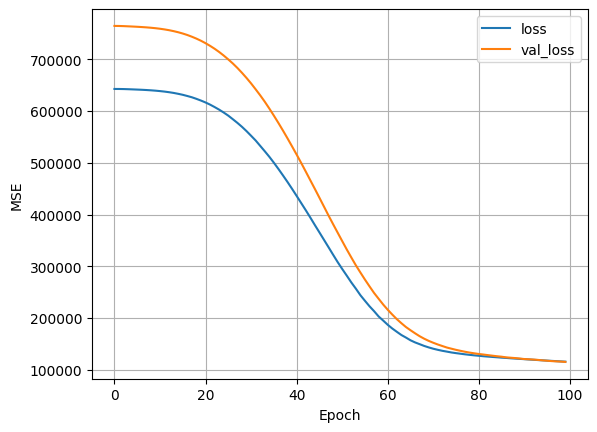

In [61]:
plot_loss(history)

In [62]:
# calculating the MSE for both linear reg and nn
y_pred_lr= all_reg.predict(X_test_all)
y_pred_nn= nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [63]:
def MSE(y_pred, y_real):
  return (np.square(y_pred, y_real)).mean()

In [64]:
MSE(y_pred_lr, y_test_all.astype(float))

605998.7166735717

In [65]:
MSE(y_pred_nn, y_test_all.astype(float))

569324.6805419922

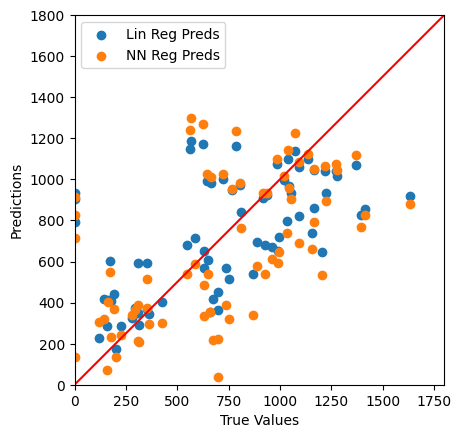

In [67]:
ax =  plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='Lin Reg Preds')
plt.scatter(y_test_all, y_pred_nn, label='NN Reg Preds')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c='red')